# Exploration of the PTBDB-Database

### **Loading the Data and first Exploration**

In [1]:
# Load packages and Data

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

ptbdb_abnormal_df = pd.read_csv("ptbdb_abnormal.csv")
ptbdb_normal_df = pd.read_csv("ptbdb_normal.csv")

In [2]:
# PTBDB Normal; Basic Statistic and Exploration

new_column_names = range(1, len(ptbdb_normal_df.columns) + 1)
ptbdb_normal_df.columns = new_column_names

In [3]:
# PTBDB Abnormal; Basic Statistic and Exploration

new_column_names = range(1, len(ptbdb_abnormal_df.columns) + 1)
ptbdb_abnormal_df.columns = new_column_names
#ptbdb_abnormal_df.head()
ptbdb_abnormal_df[188].describe()
#ptbdb_abnormal_df.isna().sum().sum()

count    10505.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: 188, dtype: float64

In [4]:
# Combining the two Dataframes 
ptbdb_comb_df = pd.concat([ptbdb_normal_df, ptbdb_abnormal_df], ignore_index=True)

# Transforming the Target Variable to Integer
ptbdb_comb_df[188]=ptbdb_comb_df[188].astype(int)

# Data Exploration
ptbdb_comb_df.describe()
# ptbdb_comb_df[1].value_counts()
#ptbdb_comb_df.isna().sum().sum()
ptbdb_comb_df.shape
#ptbdb_comb_df[188].value_counts()
ptbdb_comb_df.head()

,1,2,3,4,5,6,7,8,9,10,...,179,180,181,182,183,184,185,186,187,188
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [36]:
ptbdb_comb_df.head()
ptbdb_comb_df[188].value_counts()

188
1    10505
0     4045
Name: count, dtype: int64

In [5]:
# Verification that all Values are between 0 and 1
print(ptbdb_comb_df.max().max())
print(ptbdb_comb_df.min().min())

1.0
0.0


### **First Visualization**

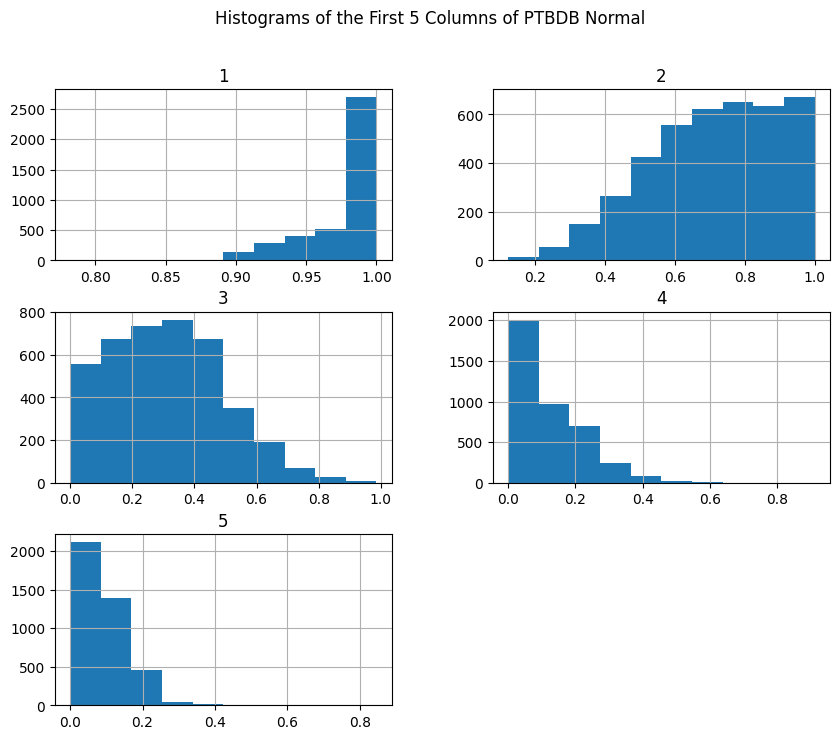

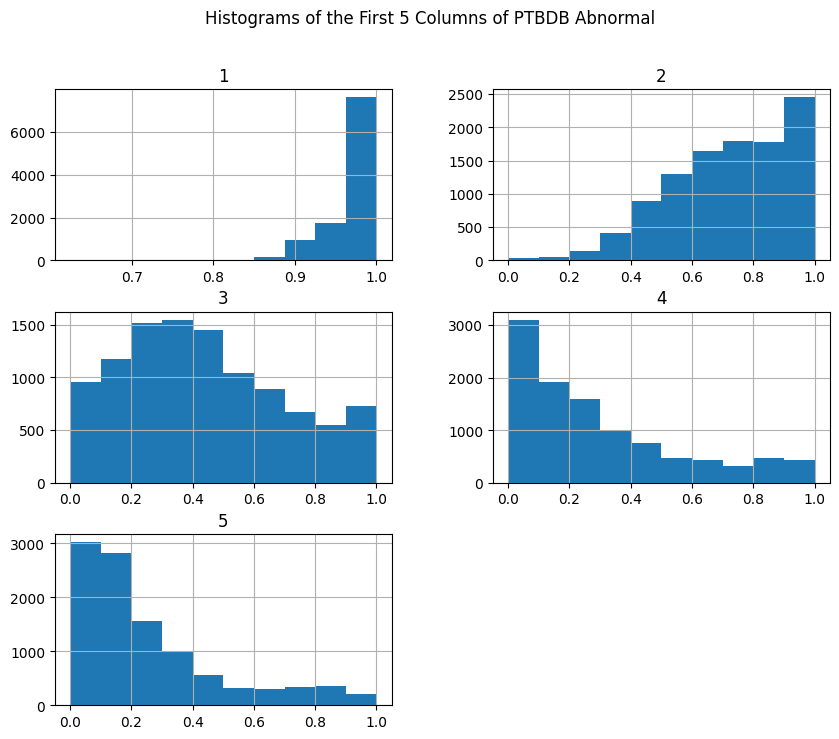

In [6]:
# Histograms of the first Columns

ptbdb_normal_df.iloc[:, :5].hist(figsize=(10, 8))
plt.suptitle('Histograms of the First 5 Columns of PTBDB Normal')
plt.show()
ptbdb_abnormal_df.iloc[:, :5].hist(figsize=(10, 8))
plt.suptitle('Histograms of the First 5 Columns of PTBDB Abnormal')
plt.show()

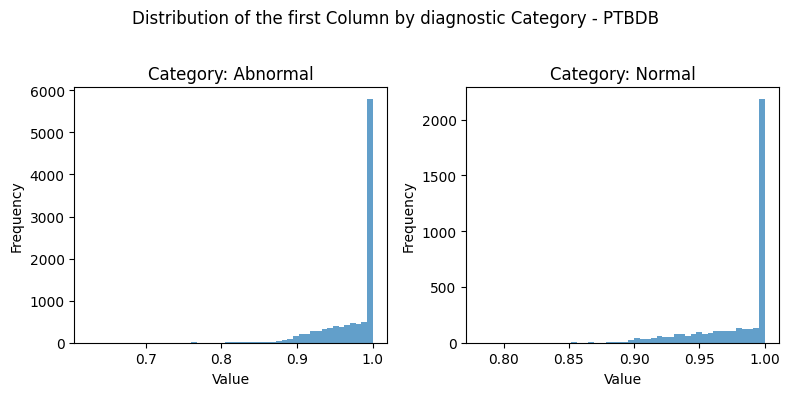

In [51]:
# Distribution of the first Column - Seperated by the Target Variable

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(ptbdb_abnormal_df.iloc[:, 0], bins=50, alpha=0.7, label='Abnormal')
plt.title('Category: Abnormal')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(ptbdb_normal_df.iloc[:, 0], bins=50, alpha=0.7, label='Normal')
plt.title('Category: Normal')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of the first Column by diagnostic Category - PTBDB', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.savefig('PTBDB_dist_first_row.png')
plt.show()

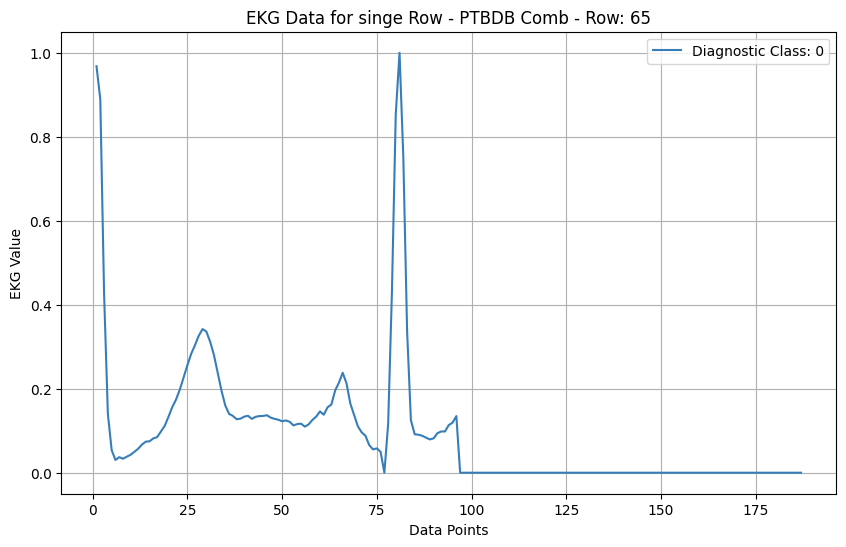

In [27]:
# Grafic Representation of raw Data (Single preprocessed EKG-Signal) - PTBDB Comb

#Choose Row to display: 
row_to_display = 65

plt.figure(figsize=(10, 6))
plt.plot(range(1, 188), ptbdb_comb_df.iloc[row_to_display, :187], 
         label= f"Diagnostic Class: {ptbdb_comb_df.iloc[row_to_display, 187]}" , color='#377eb8')
plt.xlabel('Data Points')
plt.ylabel('EKG Value')
plt.title(f'EKG Data for singe Row - PTBDB Comb - Row: {row_to_display}')
plt.legend()
plt.grid(True)
plt.show();

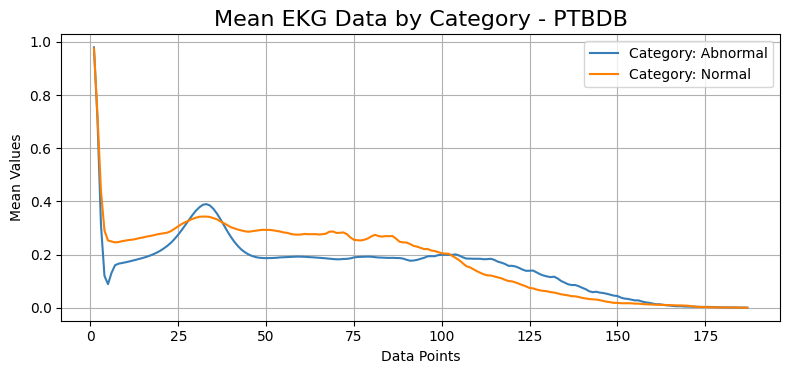

In [48]:
import matplotlib.pyplot as plt

# Group by the category in the column named '188'
grouped = ptbdb_comb_df.groupby(188)
# Calculate the mean for each category across the 187 columns
means = grouped.mean()
colors = ['#377eb8', '#ff7f00']  # Adjust colors to match the number of categories

# Category mapping
category_mapping = {0: 'Abnormal', 1: 'Normal'}

# Plot the means for each category
plt.figure(figsize=(8, 4))
for i, category in enumerate(means.index):
    plt.plot(range(1, 188), means.loc[category], label=f'Category: {category_mapping[category]}', color=colors[i])
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean EKG Data by Category - PTBDB', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.legend()
plt.grid(True)
plt.savefig('mean_data_PTBDB.png')
plt.show()

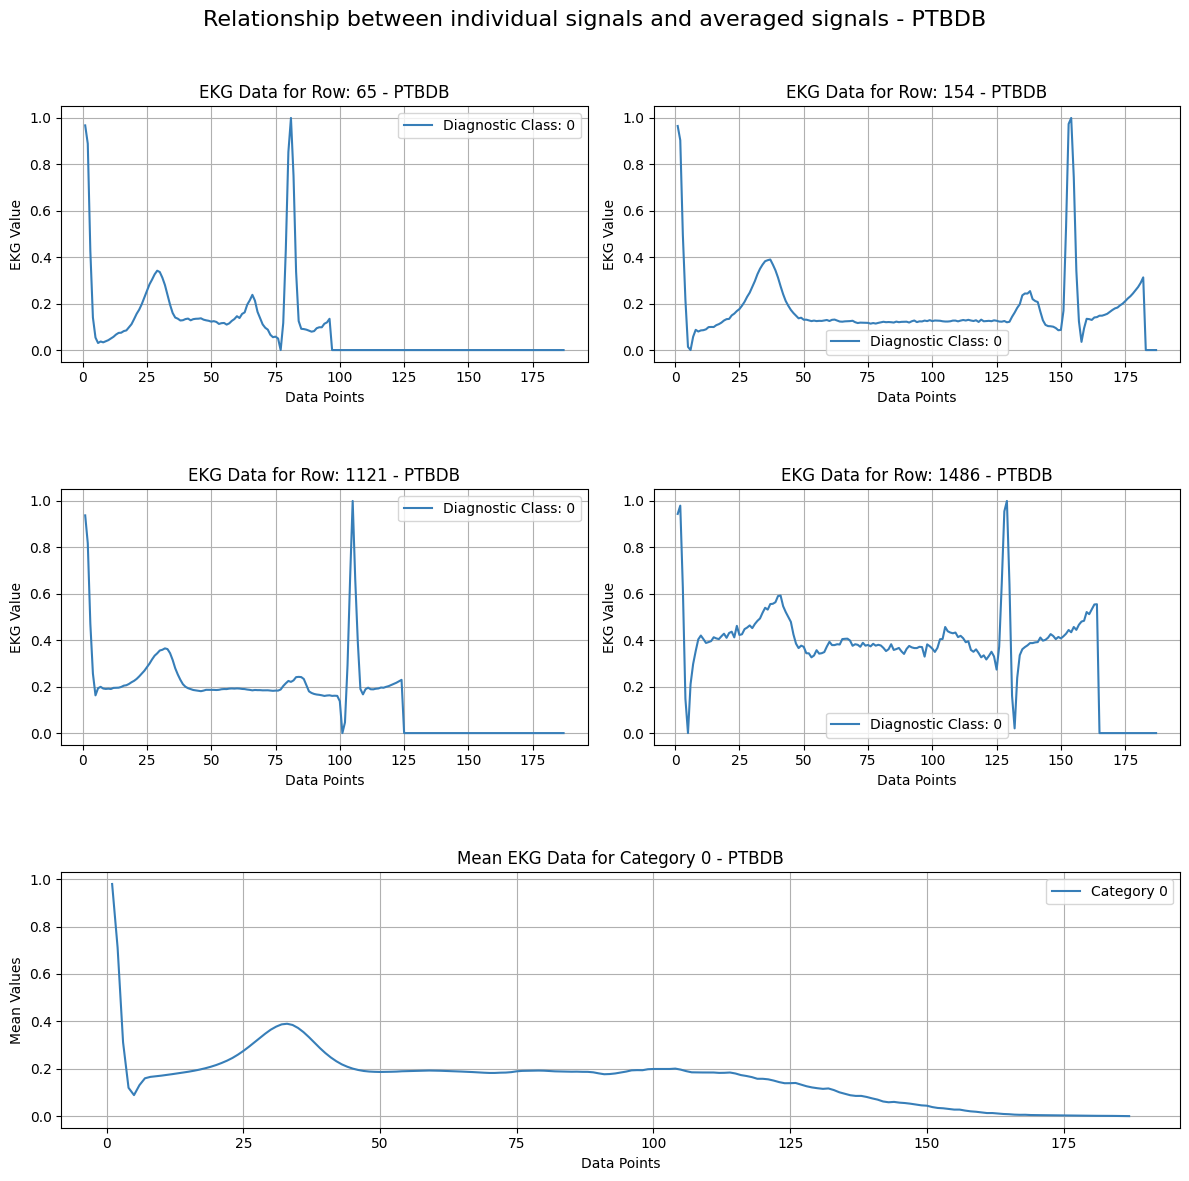

In [29]:
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot 1: Example individual signal
axs[0, 0].plot(range(1, 188), ptbdb_comb_df.iloc[65, :187], 
               label=f'Diagnostic Class: {ptbdb_comb_df.iloc[65, 187]}', color=colors[0])
axs[0, 0].set_xlabel('Data Points')
axs[0, 0].set_ylabel('EKG Value')
axs[0, 0].set_title('EKG Data for Row: 65 - PTBDB')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 2: Example individual signal
axs[0, 1].plot(range(1, 188), ptbdb_comb_df.iloc[154, :187], 
               label=f'Diagnostic Class: {ptbdb_comb_df.iloc[154, 187]}', color=colors[0])
axs[0, 1].set_xlabel('Data Points')
axs[0, 1].set_ylabel('EKG Value')
axs[0, 1].set_title('EKG Data for Row: 154 - PTBDB')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot 3: Example individual signal
axs[1, 0].plot(range(1, 188), ptbdb_comb_df.iloc[1119, :187], 
               label=f'Diagnostic Class: {ptbdb_comb_df.iloc[1121, 187]}', color=colors[0])
axs[1, 0].set_xlabel('Data Points')
axs[1, 0].set_ylabel('EKG Value')
axs[1, 0].set_title('EKG Data for Row: 1121 - PTBDB')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot 4: Example individual signal
axs[1, 1].plot(range(1, 188), ptbdb_comb_df.iloc[1486, :187], 
               label=f'Diagnostic Class: {ptbdb_comb_df.iloc[1486, 187]}', color=colors[0])
axs[1, 1].set_xlabel('Data Points')
axs[1, 1].set_ylabel('EKG Value')
axs[1, 1].set_title('EKG Data for Row: 1486 - PTBDB')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Displaying the Mean by category in a larger subplot spanning the entire bottom row
for ax in axs[2, :]:
    ax.remove()  # Remove the empty subplots at the bottom row

ax_mean = fig.add_subplot(3, 1, 3)  # Add a new subplot spanning the entire bottom row

grouped = ptbdb_comb_df.groupby(188)
means = grouped.mean()
category_0_mean = means.loc[0]
ax_mean.plot(range(1, 188), category_0_mean, label='Category 0', color=colors[0])
ax_mean.set_xlabel('Data Points')
ax_mean.set_ylabel('Mean Values')
ax_mean.set_title('Mean EKG Data for Category 0 - PTBDB')
ax_mean.legend()
ax_mean.grid(True)

# Add main title
fig.suptitle('Relationship between individual signals and averaged signals - PTBDB', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the main title
plt.subplots_adjust(hspace=0.5)  # Increase the space between subplots if needed
plt.savefig('PTBDB_signal_korrelation_normal.png')
plt.show()

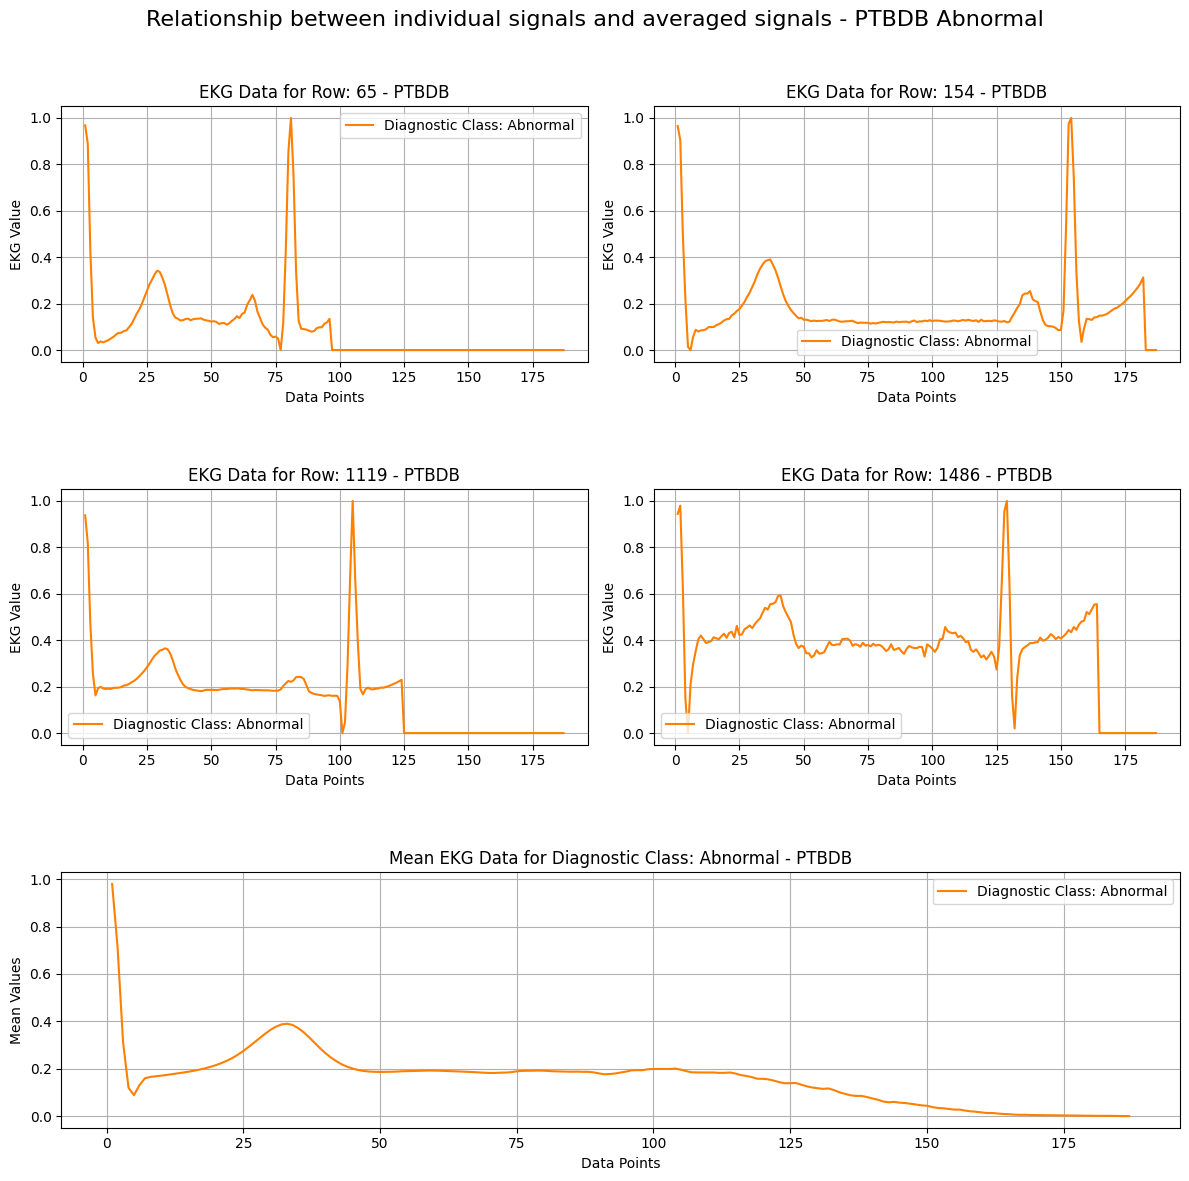

In [46]:
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']

# Category mapping
category_mapping = {0: 'Abnormal', 1: 'Normal'}

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot 1: Example individual signal
axs[0, 0].plot(range(1, 188), ptbdb_comb_df.iloc[65, :187], 
               label=f'Diagnostic Class: {category_mapping[ptbdb_comb_df.iloc[65, 187]]}', color=colors[1])
axs[0, 0].set_xlabel('Data Points')
axs[0, 0].set_ylabel('EKG Value')
axs[0, 0].set_title('EKG Data for Row: 65 - PTBDB')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 2: Example individual signal
axs[0, 1].plot(range(1, 188), ptbdb_comb_df.iloc[154, :187], 
               label=f'Diagnostic Class: {category_mapping[ptbdb_comb_df.iloc[154, 187]]}', color=colors[1])
axs[0, 1].set_xlabel('Data Points')
axs[0, 1].set_ylabel('EKG Value')
axs[0, 1].set_title('EKG Data for Row: 154 - PTBDB')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot 3: Example individual signal
axs[1, 0].plot(range(1, 188), ptbdb_comb_df.iloc[1119, :187], 
               label=f'Diagnostic Class: {category_mapping[ptbdb_comb_df.iloc[1119, 187]]}', color=colors[1])
axs[1, 0].set_xlabel('Data Points')
axs[1, 0].set_ylabel('EKG Value')
axs[1, 0].set_title('EKG Data for Row: 1119 - PTBDB')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot 4: Example individual signal
axs[1, 1].plot(range(1, 188), ptbdb_comb_df.iloc[1486, :187], 
               label=f'Diagnostic Class: {category_mapping[ptbdb_comb_df.iloc[1486, 187]]}', color=colors[1])
axs[1, 1].set_xlabel('Data Points')
axs[1, 1].set_ylabel('EKG Value')
axs[1, 1].set_title('EKG Data for Row: 1486 - PTBDB')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Displaying the Mean by category in a larger subplot spanning the entire bottom row
for ax in axs[2, :]:
    ax.remove()  # Remove the empty subplots at the bottom row

ax_mean = fig.add_subplot(3, 1, 3)  # Add a new subplot spanning the entire bottom row

grouped = ptbdb_comb_df.groupby(188)
means = grouped.mean()
category_0_mean = means.loc[0]
ax_mean.plot(range(1, 188), category_0_mean, label='Diagnostic Class: Abnormal', color=colors[1])
ax_mean.set_xlabel('Data Points')
ax_mean.set_ylabel('Mean Values')
ax_mean.set_title('Mean EKG Data for Diagnostic Class: Abnormal - PTBDB')
ax_mean.legend()
ax_mean.grid(True)

# Add main title
fig.suptitle('Relationship between individual signals and averaged signals - PTBDB Abnormal', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the main title
plt.subplots_adjust(hspace=0.5)  # Increase the space between subplots if needed
plt.savefig('PTBDB_signal_korrelation_abnormal.png')
plt.show()


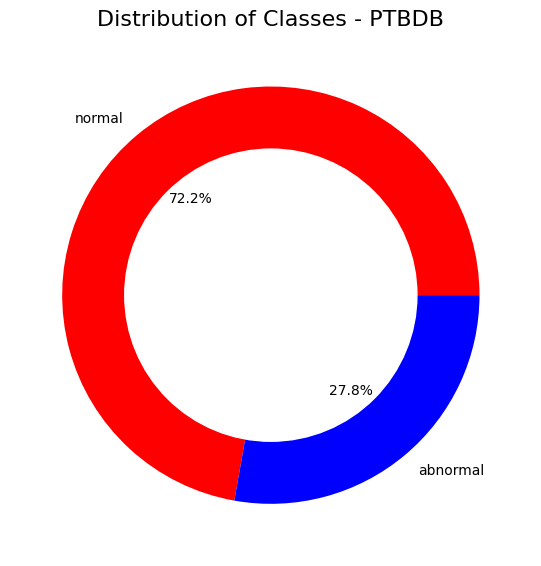

In [33]:
# Distribution of Classes in PTBDB - Comb

equilibre=ptbdb_comb_df[188].value_counts()
# equilibre.head()

plt.figure(figsize=(12,6))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=["normal", "abnormal"], 
        colors=['red','blue'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Distribution of Classes - PTBDB', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the main title
plt.savefig('PTBDB_class_distribution.png')
plt.show();

### **First Statistical Evaluation**

In [11]:
# Pearson Correlation

# plt.figure(figsize=(16,15))
# sns.heatmap(ptbdb_comb_df.corr(),  annot=True, cmap="RdBu_r", center =0);

# Does this already qualify as modern art?

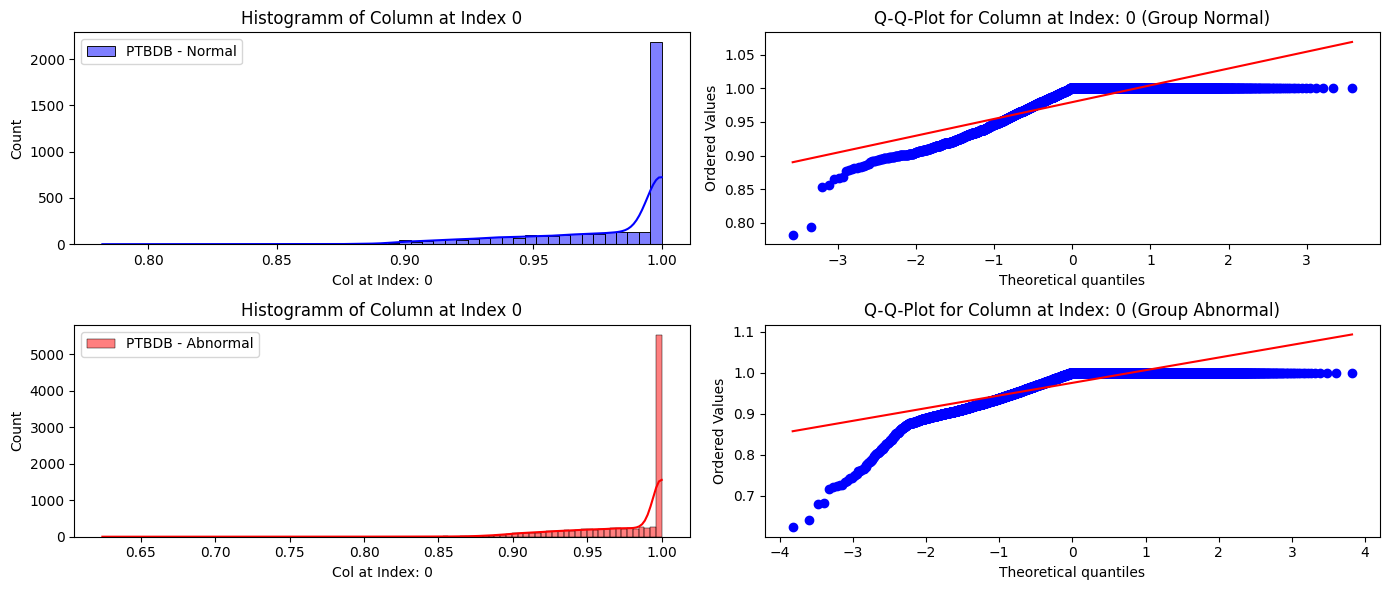

In [12]:
# Normal-Distribution of the explainatory variables? - Visual

# Choose Column to Check: 
column = 0

X = ptbdb_comb_df.iloc[:, :-1]  
y = ptbdb_comb_df.iloc[:, -1]   
normal = X[y == 0]
abnormal = X[y == 1]

plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.histplot(normal.iloc[:, column], kde=True, color='blue', label='PTBDB - Normal')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at Index {column}')

plt.subplot(2, 2, 2)
stats.probplot(normal.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot for Column at Index: {column} (Group Normal)')

plt.subplot(2, 2, 3)
sns.histplot(abnormal.iloc[:, column], kde=True, color='red', label='PTBDB - Abnormal')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at Index {column}')

plt.subplot(2, 2, 4)
stats.probplot(abnormal.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot for Column at Index: {column} (Group Abnormal)')

plt.tight_layout()
plt.show()

In [13]:
# Test for normal distribution with D'Agostino and Pearson's Normality Test

from scipy.stats import normaltest

def check_normality(data, alpha=0.05):
    stat, p = normaltest(data)
    return p > alpha, stat, p

normality_results = []
for column in X.columns:
    is_normal_normal_group, stat_normal, p_normal = check_normality(normal[column])
    is_normal_abnormal_group, stat_abnormal, p_abnormal = check_normality(abnormal[column])
    normality_results.append({
        'Variable': column,
        'is_normal_normal_group': is_normal_normal_group,
        'dagostino_stat_normal': stat_normal,
        'p_val_normal': p_normal,
        'is_normal_abnormal_group': is_normal_abnormal_group,
        'dagostino_stat_abnormal': stat_abnormal,
        'p_val_abnormal': p_abnormal
    })

results_df = pd.DataFrame(normality_results)

# Sort results if needed:
# sorted_results_df = results_df.sort_values(by='p_val_normal')

# Data filtering to identify variables:
filtered_results_df = results_df[
    (results_df['is_normal_normal_group'] == True) &
    (results_df['is_normal_abnormal_group'] == True)]

#results_df.head(100)
filtered_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Variable                  0 non-null      int64  
 1   is_normal_normal_group    0 non-null      bool   
 2   dagostino_stat_normal     0 non-null      float64
 3   p_val_normal              0 non-null      float64
 4   is_normal_abnormal_group  0 non-null      bool   
 5   dagostino_stat_abnormal   0 non-null      float64
 6   p_val_abnormal            0 non-null      float64
dtypes: bool(2), float64(4), int64(1)
memory usage: 0.0 bytes


### **First Conclusions**
- 14550 Entries; Normal: 4045 (27,8%); Abnormal: 10505
- There are no missing values
- The values of all explanatory variables are normalized continous variables with values between 0 and 1
- The target variable is a nominal categorical variable with a value of 0 or 1
- None of the explanatory variables is normal distributed (Shapiro-Wilk-Test)

### **Challenges**
- There is a potential distortion from cropping, (downsampling) and padding with zeros
- The QRS-Complexes are not centered
- peak at Column 1-3; 
- A further challenge is that the distinction between pathologies is only possible when using the original dataset (with the kaggle Dataset there is "only" Normal and Abnormal)
- Structural problem of "only" a heatbeat, Normal EKG-Data contains more than one heartbeat because it has diagnostic relevance